# Analyse de la personalité des clients

### Ema Galuppini, Julie Laurent, Quentin Senatore et Quentin Touil

## Présentation des Données à analyser :

Le jeu de données étudié provient d'une campagne marketing et contient diverses informations sur les clients, incluant leurs caractéristiques démographiques, leurs habitudes de consommation et leur réponse aux actions marketing. Ce type de données est particulièrement intéressant pour comprendre les comportements des consommateurs et optimiser les stratégies marketing des entreprises.

L’analyse de la personnalité des clients aide une entreprise à adapter son produit en fonction de ses clients cibles provenant de différents segments de clientèle. Par exemple, au lieu de dépenser de l’argent pour commercialiser un nouveau produit auprès de tous les clients de la base de données de l’entreprise, une entreprise peut analyser quel segment de clientèle est le plus susceptible d’acheter le produit et ensuite commercialiser le produit uniquement auprès de ce segment particulier.

L’objectif de notre analyse est de dégager des tendances et d’identifier des segments de clients ayant des comportements similaires. Cela permettra d'affiner les stratégies marketing et d’optimiser les campagnes futures. Nous utiliserons des outils statistiques et des visualisations pour mieux comprendre les données.

### Jeu de données à analyser :

#### People

* ID: Customer's unique identifier 
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

#### Products

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

### Promotion

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Place

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

#### Questions sucitées :

* Qualité du jeu de données proposé ?
* Un pre-processing des données est-il nécessaire ?
* Comment se comportent les différentes variables entre elles ?
* Quel est le profil des personnes achetant du vin et/ou viande ?
* Peut on dessiner des profils types de clients à partir de leurs données quantitatives ?
* Peut on dessiner des profils types de clients à partir de leurs données qualitatives ? En particulier quel type de client dépense le plus/moins ? 

# Installation des packages utilisés et chargement des données : 

In [210]:
import pandas as pd
import numpy as np
import prince
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from statsmodels.graphics.mosaicplot import mosaic

On charge nos données.

In [211]:
marketing = pd.read_csv("marketing_campaign.csv", encoding="utf-8", sep= "\t")
marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [212]:
marketing.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


# Transformation et nettoyage des données : 

On remarque que les colonnes 'Z_CostContact' et 'Z_Revenue' contiennent les mêmes valeurs pour tous les individus et on conclut que ces données nous ne seront pas utiles pour l'analyse que l'on veut effectuer dans le cadre de ce projet. On les retire donc de notre dataset.

In [213]:
marketing.drop(['Z_CostContact','Z_Revenue'], axis=1, inplace=True)

Regardons maintenant si certaines données sont manquantes/incomplètes.

In [214]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Ici on remarque que la variable 'Income' est incomplète (24 valeurs sont manquantes comme on peut le voir dans la sortie ci-dessus).
On décide donc de remplacer ces valeurs par la médiane des valeurs de Income. 

In [215]:
marketing.fillna({'Income': marketing['Income'].median()}, inplace=True)

On met en facteur les variables qualitatives pour pouvoir travailler dessus.

In [216]:
marketing['Education'] = marketing['Education'].astype('category')
marketing['Marital_Status'] = marketing['Marital_Status'].astype('category')
marketing['Kidhome'] = marketing['Kidhome'].astype('category')
marketing['Teenhome'] = marketing['Teenhome'].astype('category')
marketing['AcceptedCmp1'] = marketing['AcceptedCmp1'].astype('category')
marketing['AcceptedCmp1'] = marketing['AcceptedCmp1'].cat.rename_categories({0: 'No', 1:'Yes'})
marketing['AcceptedCmp2'] = marketing['AcceptedCmp2'].astype('category')
marketing['AcceptedCmp2'] = marketing['AcceptedCmp2'].cat.rename_categories({0: 'No', 1:'Yes'})
marketing['AcceptedCmp3'] = marketing['AcceptedCmp3'].astype('category')
marketing['AcceptedCmp3'] = marketing['AcceptedCmp3'].cat.rename_categories({0: 'No', 1:'Yes'})
marketing['AcceptedCmp4'] = marketing['AcceptedCmp4'].astype('category')
marketing['AcceptedCmp4'] = marketing['AcceptedCmp4'].cat.rename_categories({0: 'No', 1:'Yes'})
marketing['AcceptedCmp5'] = marketing['AcceptedCmp5'].astype('category')
marketing['AcceptedCmp5'] = marketing['AcceptedCmp5'].cat.rename_categories({0: 'No', 1:'Yes'})
marketing['Complain'] = marketing['Complain'].astype('category')
marketing['Complain'] = marketing['Complain'].cat.rename_categories({0: 'No', 1:'Yes'})
marketing['Response'] = marketing['Response'].astype('category')
marketing['Response'] = marketing['Response'].cat.rename_categories({0: 'No', 1:'Yes'})

On transforme la variable Dt_Customer en Date, puis on la catégorise en trois niveaux d'ancienneté.

In [217]:
marketing['Dt_Customer'] = pd.to_datetime(marketing['Dt_Customer'], format='%d-%m-%Y')

reference_date = pd.to_datetime('2015-01-01')
marketing['Customer_Since_Months'] = (reference_date - marketing['Dt_Customer']).dt.days / 30.44

bins = [-float('inf'), 12, 24, float('inf')]
labels = ['Récent', 'Moyen', 'Ancien']
marketing['Customer_Dt_Category'] = pd.cut(marketing['Customer_Since_Months'], bins=bins, labels=labels)

## Analyse des outliers

On fait les boxplots de chaque variables quantitatives pour observer si il y a des valeurs abérrantes.

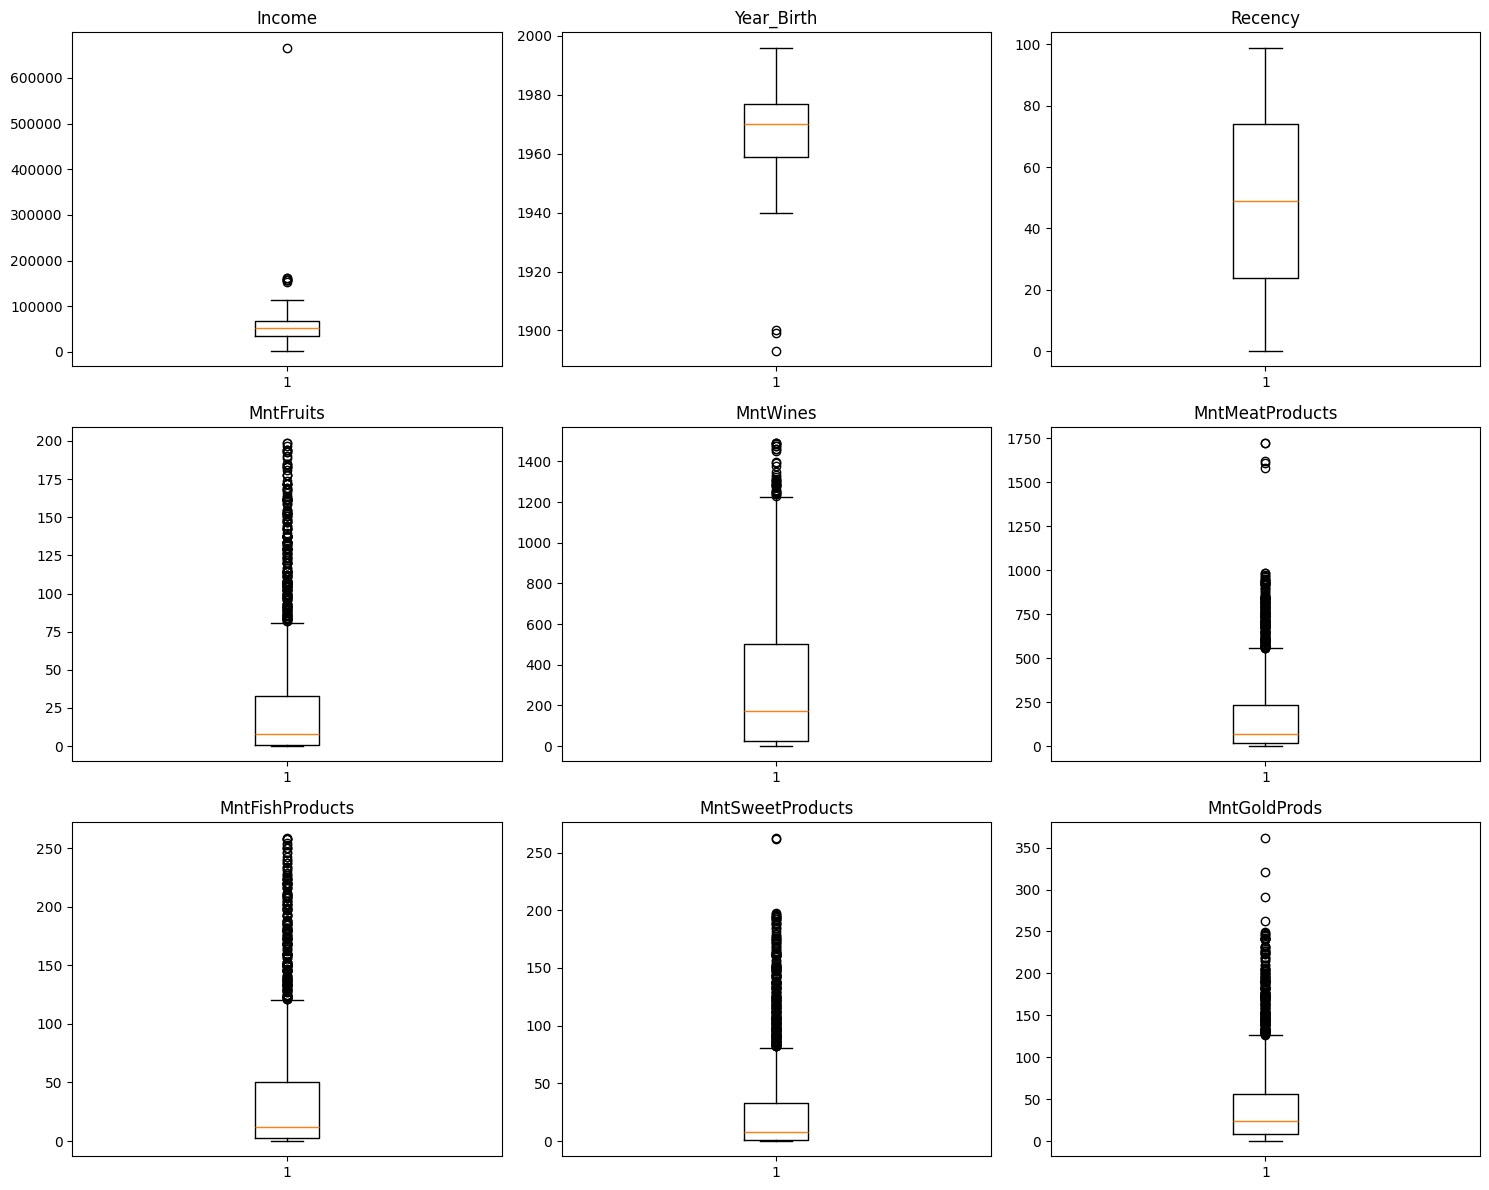

In [218]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

axes[0, 0].boxplot(marketing['Income'])
axes[0, 0].set_title('Income')

axes[0, 1].boxplot(marketing['Year_Birth'])
axes[0, 1].set_title('Year_Birth')

axes[0, 2].boxplot(marketing['Recency'])
axes[0, 2].set_title('Recency')

axes[1, 0].boxplot(marketing['MntFruits'])
axes[1, 0].set_title('MntFruits')

axes[1, 1].boxplot(marketing['MntWines'])
axes[1, 1].set_title('MntWines')

axes[1, 2].boxplot(marketing['MntMeatProducts'])
axes[1, 2].set_title('MntMeatProducts')

axes[2, 0].boxplot(marketing['MntFishProducts'])
axes[2, 0].set_title('MntFishProducts')

axes[2, 1].boxplot(marketing['MntSweetProducts'])
axes[2, 1].set_title('MntSweetProducts')

axes[2, 2].boxplot(marketing['MntGoldProds'])
axes[2, 2].set_title('MntGoldProds')

plt.tight_layout()
plt.show()

On remarque plusieurs outliers au niveau de plusieurs variables que l'on va devoir enlever.

Income : on voit un outlier.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fef91063c50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fef91080290>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fef9121de20>],
 'medians': [<matplotlib.lines.Line2D at 0x7fef91080830>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fef91080b30>],
 'means': []}

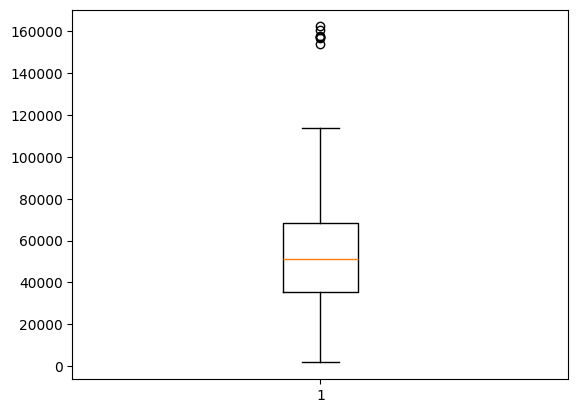

In [219]:
riche = marketing.loc[marketing['Income'] > 6e5, 'ID']
marketing = marketing.drop(marketing[marketing['ID'] == riche.iloc[0]].index)

plt.boxplot(marketing['Income'])

Year_Birth : On remarque plusieurs outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fef910b3440>,
 'caps': [<matplotlib.lines.Line2D at 0x7fef910b3980>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fef910b3170>],
 'medians': [<matplotlib.lines.Line2D at 0x7fef910b3e30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fef910e0140>],
 'means': []}

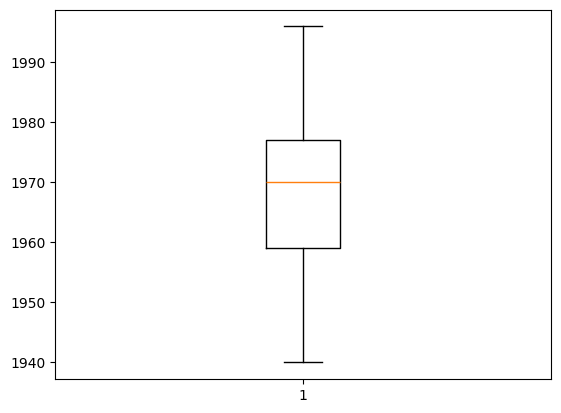

In [220]:
vieux = marketing.loc[marketing['Year_Birth'] < 1920, 'ID']
for i in vieux: 
    marketing = marketing.drop(marketing[marketing['ID'] == i].index)

plt.boxplot(marketing['Year_Birth'])

MntMeatProducts : On remarque plusieurs outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fef91125760>,
 'caps': [<matplotlib.lines.Line2D at 0x7fef91125d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fef91125550>],
 'medians': [<matplotlib.lines.Line2D at 0x7fef91126360>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fef911265d0>],
 'means': []}

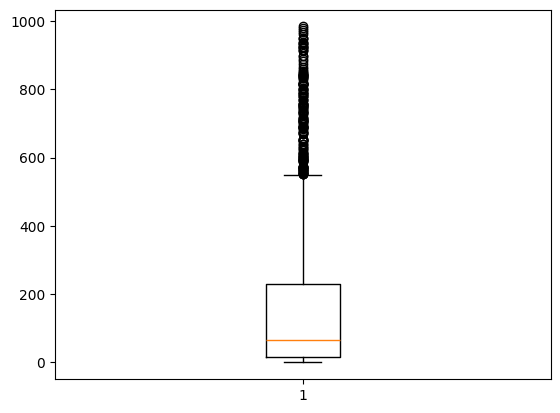

In [221]:
viandards = marketing.loc[marketing['MntMeatProducts'] > 1500, 'ID']
for i in viandards: 
    marketing = marketing.drop(marketing[marketing['ID'] == i].index)

plt.boxplot(marketing['MntMeatProducts'])

MntSweetProducts : On remarque plusieurs outliers.

In [222]:
gourmands = marketing.loc[marketing['MntSweetProducts'] > 225, 'ID']
for i in gourmands: 
    marketing = marketing.drop(marketing[marketing['ID'] == i].index)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fef90f77b30>,
 'caps': [<matplotlib.lines.Line2D at 0x7fef90f98170>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fef90f778f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fef90f986b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fef90f98950>],
 'means': []}

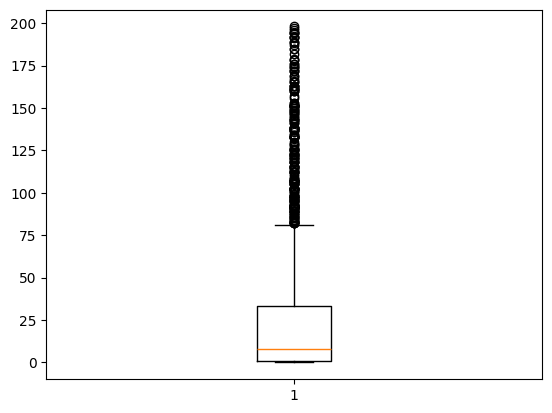

In [223]:
plt.boxplot(marketing['MntSweetProducts'])

MntGoldProds : On remarque plusieurs outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7fef90fd7080>,
 'caps': [<matplotlib.lines.Line2D at 0x7fef90fd7560>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fef90fd6db0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fef90fd7b60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fef90fd7e60>],
 'means': []}

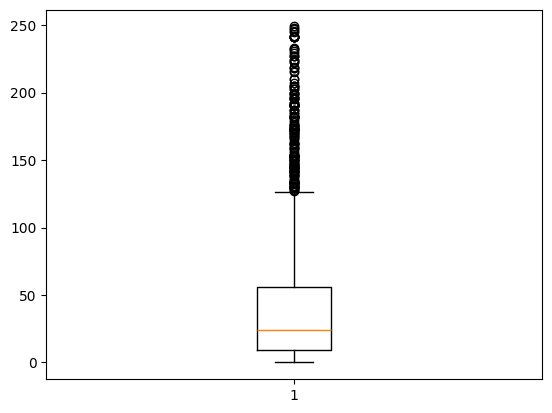

In [224]:
for i in range(3):
    marketing = marketing.drop(marketing['MntGoldProds'].idxmax())

plt.boxplot(marketing['MntGoldProds'])

### Exploration et transformation des données qualitatives

#### Statut marital

On commence par s'intéresser au statut marital.

In [225]:
marketing['Marital_Status'].value_counts()

Marital_Status
Married     860
Together    576
Single      475
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

On décide de supprimer les catégories Absurd et YOLO et les individus qui y appartiennent. De plus, nous allons regrouper les catégories Alone, Single et Widow en Seul, puis Together et Married en Couple.

In [226]:
marketing = marketing[~marketing['Marital_Status'].isin(['YOLO', 'Absurd'])]

marketing['Marital_Status'] = marketing['Marital_Status'].astype(str)

marketing['Marital_Status'] = marketing['Marital_Status'].replace({
    'Married': 'Couple',
    'Together': 'Couple',
    'Single': 'Seul',
    'Alone': 'Seul',
    'Widow': 'Seul',
    'Divorced': 'Divorcé'
})

marketing['Marital_Status'] = marketing['Marital_Status'].astype('category')

marketing['Marital_Status'].value_counts()

Marital_Status
Couple     1436
Seul        555
Divorcé     231
Name: count, dtype: int64

#### Nombre d'enfants

On va regrouper les deux variables Kidhome et Teenhoome pour creer une seule variable Total_Enfants, plus facile à analyser et à interpreter par la suite.

In [227]:
marketing['Total_Enfants'] = marketing['Kidhome'].astype(int) + marketing['Teenhome'].astype(int)
marketing['Total_Enfants'] = marketing['Total_Enfants'].astype('category')

marketing['Total_Enfants'].value_counts()

Total_Enfants
1    1119
0     630
2     420
3      53
Name: count, dtype: int64

#### Education

Afin de simplifier notre jeu de données nous allons regrouper les varaibles "Basic" et "Graduation" en une variable "Moyen". Nous allons aussi regrouper les Master et PhD en "Elevé". Enfin, nous transformons "2nd cycle" en "Faible"

In [228]:
marketing['Education'] = marketing['Education'].astype(str)

marketing['Education'] = marketing['Education'].replace({
    '2n Cycle': 'Faible',
    'Basic': 'Moyen',
    'Graduation': 'Moyen',
    'Master': 'Elevé',
    'PhD': 'Elevé',
})

marketing['Education'] = marketing['Education'].astype('category')

marketing['Education'].value_counts()

Education
Moyen     1175
Elevé      847
Faible     200
Name: count, dtype: int64

## Création de nouvelles variables 

#### Campagnes acceptées

Pour le nombre de campagnes on va créer une nouvelle variable : le nombre de promotion acceptées.

In [229]:
marketing['Total_Cmp'] = marketing[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].apply(lambda x: x.cat.codes).sum(axis=1)

marketing['Total_Cmp'].value_counts()

Total_Cmp
0    1617
1     367
2     142
3      50
4      36
5      10
Name: count, dtype: int64

#### Argent dépensé

On créé une nouvelle variable qui prend le total des dépenses pour chaque catégorie. (Viandes, Fruits, etc.)

In [230]:
marketing['Total_Depense']= marketing[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

marketing['Total_Depense'].describe()

count    2222.000000
mean      603.612511
std       601.163938
min         5.000000
25%        68.000000
50%       395.000000
75%      1041.500000
max      2525.000000
Name: Total_Depense, dtype: float64

#### Achats

On veut aussi créer un variable qui regroupe le nombre d'achats total de chaque client.

In [231]:
marketing['Total_Achat'] = marketing[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

marketing['Total_Achat'].describe()

count    2222.000000
mean       12.500900
std         7.170073
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        32.000000
Name: Total_Achat, dtype: float64

#### Age

On crée une variable Age. 

In [232]:
annee_actuelle = 2015
marketing['Age'] = annee_actuelle - marketing['Year_Birth']


marketing['Age'].describe()

count    2222.000000
mean       46.132763
std        11.697058
min        19.000000
25%        38.000000
50%        45.000000
75%        56.000000
max        75.000000
Name: Age, dtype: float64

On crée aussi des catégories d'âge. On enlève donc la variable Year_Birth qui devient redondante.

In [233]:
marketing["Age_Categorie"] = pd.cut(
    2015 - marketing["Year_Birth"],
    bins=[18, 30, 45, 60, float('inf')],
    labels=["0-30", "30-45", "45-60", "60+"],
    right=True
)

marketing.drop('Year_Birth', axis=1, inplace=True)

# Analyse exploratoire bidimensionnelle

L'objectif est de faire une première analyse sur toutes les variables quantitatives et qualitatives.

### Comparaison des variables quantitataives/quantitatatives

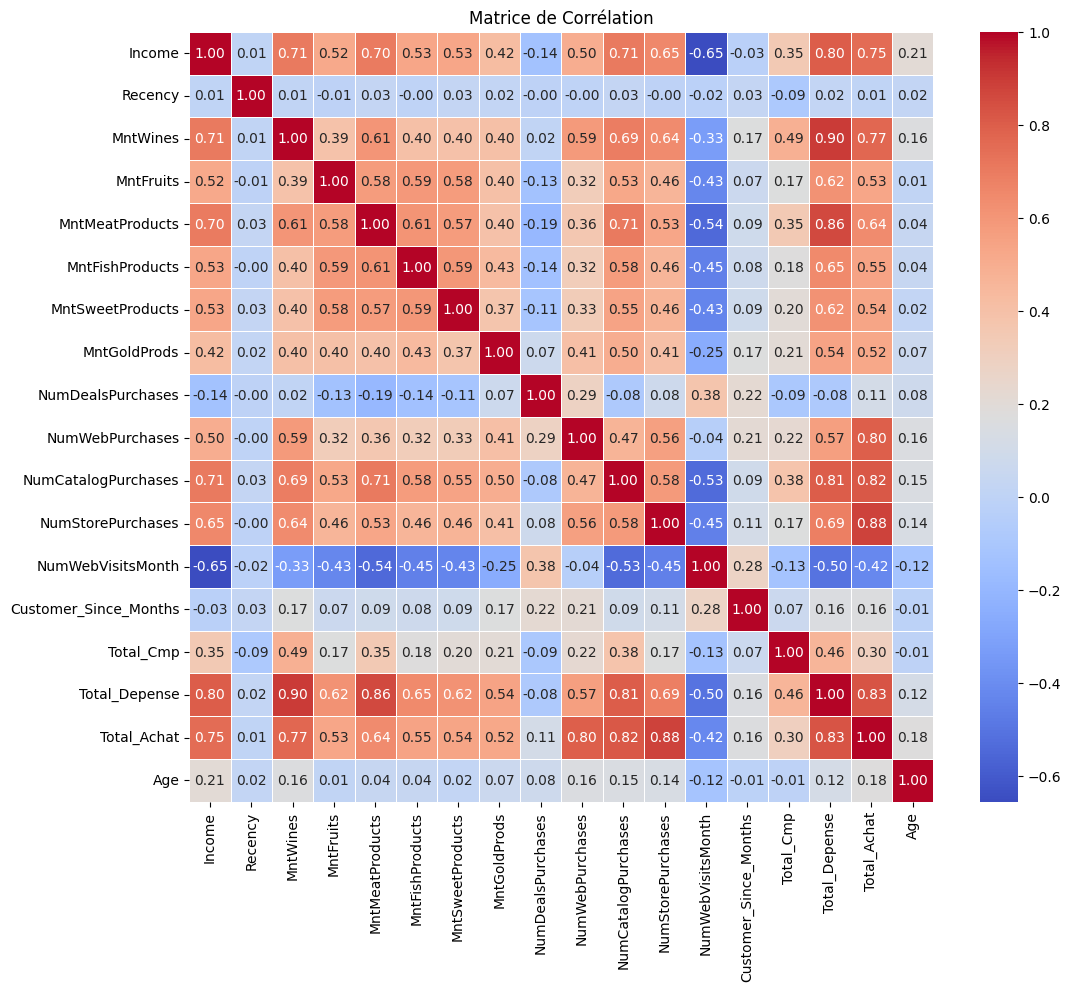

In [235]:
numeric_columns = marketing.select_dtypes(include=['number']).drop(columns=['ID'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, )
plt.title('Matrice de Corrélation')
plt.show()

In [236]:
sns.pairplot(numeric_columns)
plt.show()

### Comparaison des variables qualitatives/qualitatives

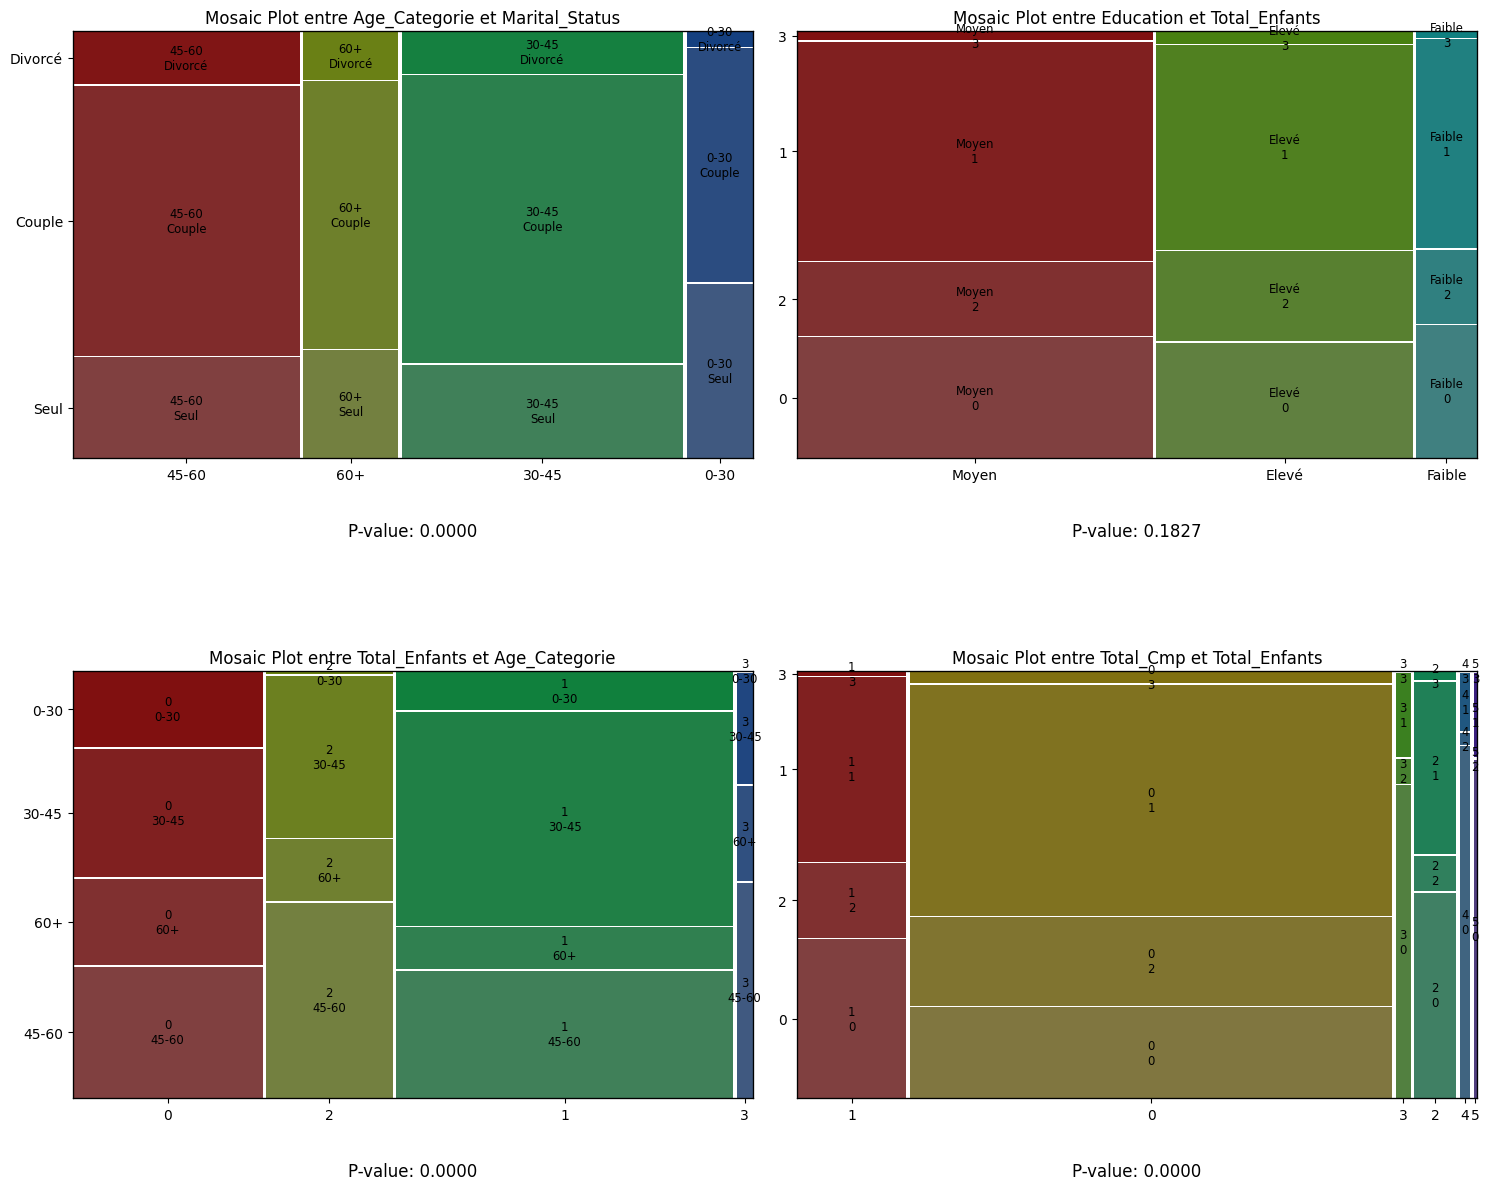

In [256]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

mosaic(marketing, ['Age_Categorie', 'Marital_Status'], ax=axes[0,0])
axes[0,0].set_title('Mosaic Plot entre Age_Categorie et Marital_Status')

contingency_table = pd.crosstab(marketing['Age_Categorie'], marketing['Marital_Status'])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
axes[0,0].text(0.5, -0.15, f"P-value: {p_value:.4f}", ha='center', va='top', transform=axes[0,0].transAxes, fontsize=12)

mosaic(marketing, ['Education', 'Total_Enfants'], ax=axes[0,1])
axes[0,1].set_title('Mosaic Plot entre Education et Total_Enfants')

contingency_table = pd.crosstab(marketing['Education'], marketing['Total_Enfants'])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
axes[0,1].text(0.5, -0.15, f"P-value: {p_value:.4f}", ha='center', va='top', transform=axes[0,1].transAxes, fontsize=12)

mosaic(marketing, ['Total_Enfants', 'Age_Categorie'], ax=axes[1,0])
axes[1,0].set_title('Mosaic Plot entre Total_Enfants et Age_Categorie')

contingency_table = pd.crosstab(marketing['Total_Enfants'], marketing['Age_Categorie'])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
axes[1,0].text(0.5, -0.15, f"P-value: {p_value:.4f}", ha='center', va='top', transform=axes[1,0].transAxes, fontsize=12)

mosaic(marketing, ['Total_Cmp', 'Total_Enfants'], ax=axes[1,1])
axes[1,1].set_title('Mosaic Plot entre Total_Cmp et Total_Enfants')

contingency_table = pd.crosstab(marketing['Total_Cmp'], marketing['Total_Enfants'])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
axes[1,1].text(0.5, -0.15, f"P-value: {p_value:.4f}", ha='center', va='top', transform=axes[1,1].transAxes, fontsize=12)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

### Comparaison des variables quantitatives/qualitatives

Text(0.5, 1.0, 'Violin plot entre Total_Enfants et Income')

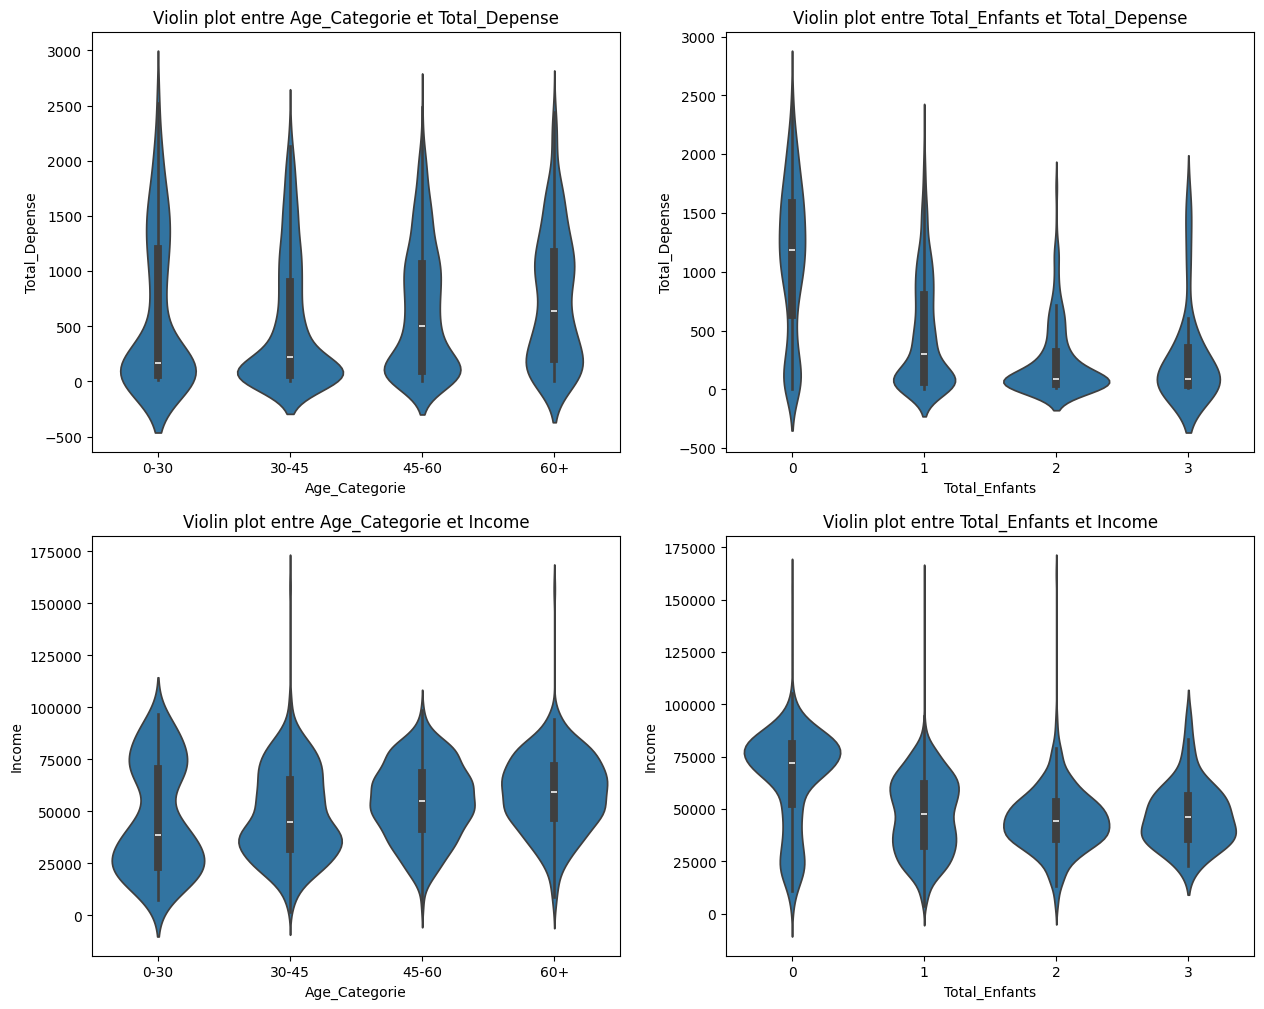

In [244]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.violinplot(x='Age_Categorie', y='Total_Depense', data=marketing, ax=axes[0,0])
axes[0,0].set_title('Violin plot entre Age_Categorie et Total_Depense')

sns.violinplot(x='Total_Enfants', y='Total_Depense', data=marketing, ax=axes[0,1])
axes[0,1].set_title('Violin plot entre Total_Enfants et Total_Depense')

sns.violinplot(x='Age_Categorie', y='Income', data=marketing, ax=axes[1,0])
axes[1,0].set_title('Violin plot entre Age_Categorie et Income')

sns.violinplot(x='Total_Enfants', y='Income', data=marketing, ax=axes[1,1])
axes[1,1].set_title('Violin plot entre Total_Enfants et Income')

# Analyse multivariée

### Analyse en composantes principales (ACP)